### Score Predictions Using Linear Regression

>We are going to predict students score based on hours studies Using Linear regression from Sickit-Learn

In [98]:
### Importing libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [99]:
#loading our DATAFRAME
df=pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [100]:
#Shape
df.shape

(25, 2)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [102]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


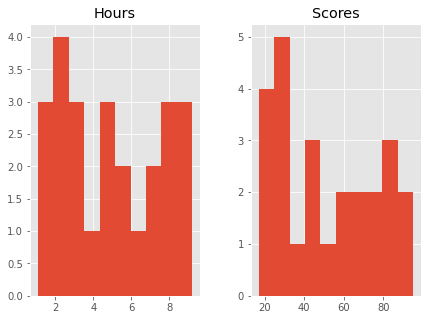

In [103]:
style.use('ggplot')
df.hist(figsize=(7,5))
plt.show()

Observation: 
 the majority of students studies between 2 and 3 hours


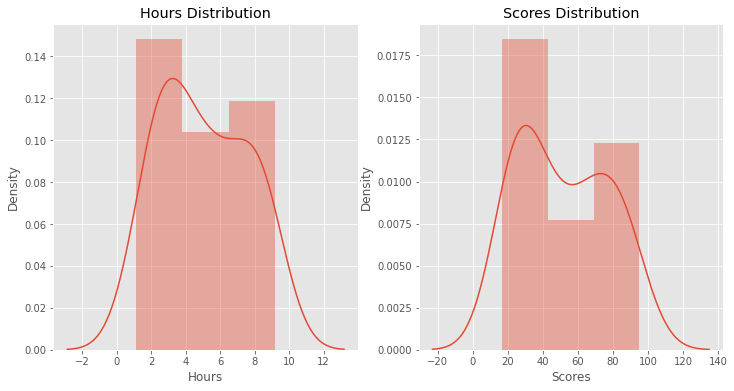

In [104]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df["Hours"])
plt.title("Hours Distribution")
plt.subplot(1,2,2)
sns.distplot(df["Scores"])
plt.title("Scores Distribution")
plt.show()

Text(0.5, 1.0, 'Correlation between Scores and Hours')

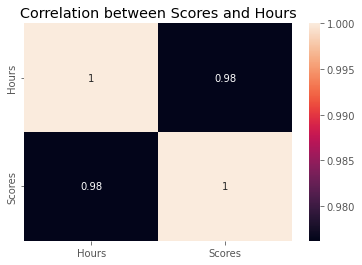

In [105]:
### Correlation between Variables
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation between Scores and Hours')

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.** 

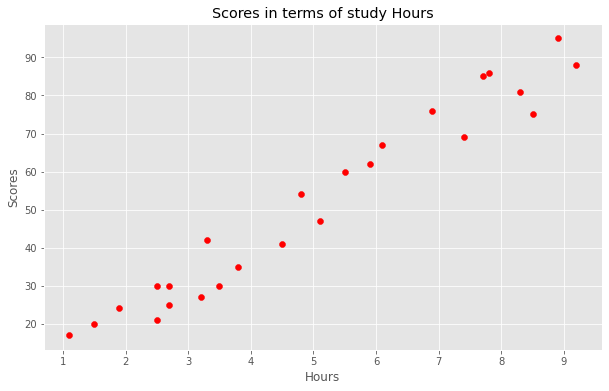

In [106]:
# let's plot a scatter plot to see the relationship
plt.figure(figsize=(10,6))
plt.scatter(df['Hours'],df['Scores'],color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores in terms of study Hours')
plt.show()

#building Model

In [107]:
X=df['Hours']
y=df['Scores']
print("X_shape:",X.shape)
print("y_shape:",y.shape)

X_shape: (25,)
y_shape: (25,)


In [108]:
X=X.values.reshape(-1,1)


In [109]:
print("X_shape:",X.shape)

X_shape: (25, 1)


In [110]:
# let's split our data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [111]:
# let's Standardize and Normalize our Data
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [112]:
#Fitting our Model
linrreg=LinearRegression()
linrreg.fit(X_train_scaled,y_train)
linreg_pred=linrreg.predict(X_test_scaled)
DataFrame=pd.DataFrame({"Actual_results":y_test,"Predictions":linreg_pred})
DataFrame

,Actual_results,Predictions
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


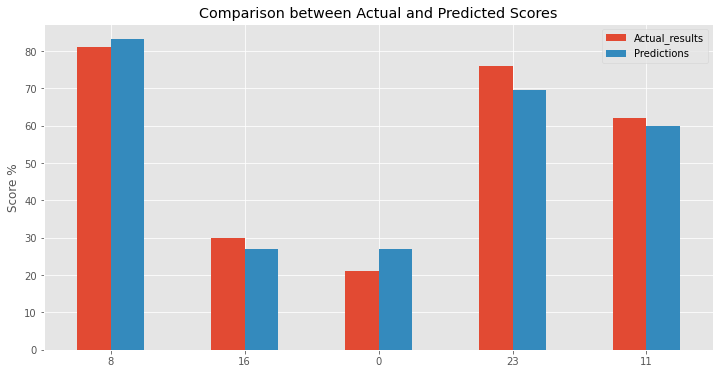

In [113]:
DataFrame.plot(kind="bar",figsize=(12,6))
plt.legend()
plt.xticks(rotation=0)
plt.ylabel('Score %')
plt.title('Comparison between Actual and Predicted Scores')

plt.show()

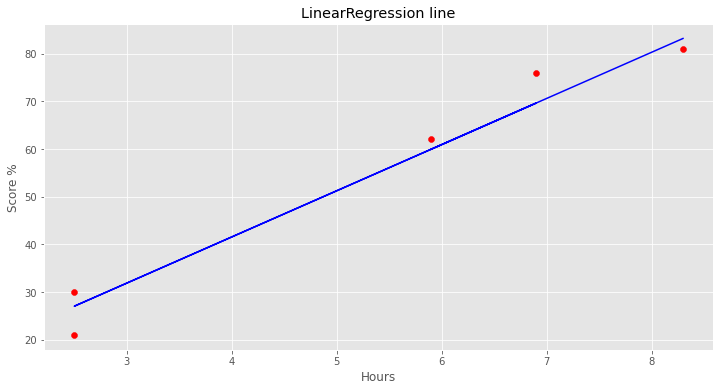

In [121]:
## let's plot our best fit line:
best_slope=linrreg.coef_
best_intercept=linrreg.intercept_
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,linreg_pred,color='blue')
plt.xlabel('Hours')
plt.ylabel('Score %')
plt.title("LinearRegression line")
plt.show()

###Evaluation of our Model

In [136]:
print("r^2 square:",r2_score(y_test,linreg_pred))
print("mean absolute error:",mean_absolute_error(y_test,linreg_pred))
print("mean squared error:",mean_squared_error(y_test,linreg_pred))


r^2 square: 0.9678055545167993
mean absolute error: 3.9207511902099257
mean squared error: 18.94321172231529


In [134]:
# testing
hours = 9.25
hours_scaled=(hours-df['Hours'].mean())/df['Hours'].std()
own_pred = linrreg.predict(np.array(hours_scaled).reshape(1,-1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = 9.25
Predicted Score = 91.50540850990585


### THANKS TO YOUR ATTENTION